In [1]:
import pandas as pd

In [2]:
df  = pd.read_csv("..\StockUniteLegale_utf8\StockUniteLegale_utf8.csv", chunksize=1000000,low_memory=False)
df = pd.DataFrame(df.get_chunk(1000000))

In [3]:
df

,siren,statutDiffusionUniteLegale,unitePurgeeUniteLegale,dateCreationUniteLegale,sigleUniteLegale,sexeUniteLegale,prenom1UniteLegale,prenom2UniteLegale,prenom3UniteLegale,prenom4UniteLegale,...,denominationUsuelle1UniteLegale,denominationUsuelle2UniteLegale,denominationUsuelle3UniteLegale,categorieJuridiqueUniteLegale,activitePrincipaleUniteLegale,nomenclatureActivitePrincipaleUniteLegale,nicSiegeUniteLegale,economieSocialeSolidaireUniteLegale,societeMissionUniteLegale,caractereEmployeurUniteLegale
0,325175,O,NaN,2000-09-26,NaN,M,THIERRY,NaN,NaN,NaN,...,NaN,NaN,NaN,1000.0,32.12Z,NAFRev2,65,NaN,NaN,N
1,1807254,O,NaN,1972-05-01,NaN,M,JACQUES-LUCIEN,NaN,NaN,NaN,...,NaN,NaN,NaN,1000.0,85.59A,NAFRev2,22,NaN,NaN,N
2,5410220,O,True,1954-12-25,NaN,M,GEORGES,NaN,NaN,NaN,...,NaN,NaN,NaN,1000.0,22.02,NAP,15,NaN,NaN,N
3,5410345,O,True,NaN,NaN,M,MICHEL,NaN,NaN,NaN,...,NaN,NaN,NaN,1000.0,79.06,NAP,10,NaN,NaN,N
4,5410394,O,True,1954-12-25,NaN,M,ROBERT,ALFRED,NaN,NaN,...,NaN,NaN,NaN,1000.0,64.42,NAP,18,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,312014335,O,True,NaN,NaN,F,BRIGITTE,NaN,NaN,NaN,...,NaN,NaN,NaN,1000.0,67.01,NAP,11,NaN,NaN,N
999996,312014343,O,NaN,1978-01-01,NaN,F,LUCIENNE,NaN,NaN,NaN,...,NaN,NaN,NaN,1000.0,52.2L,NAFRev1,15,NaN,NaN,N
999997,312014350,O,True,1978-01-01,NaN,M,PATRICE,XAVIER,DENIS,NaN,...,NaN,NaN,NaN,1000.0,70.2C,NAF1993,10,NaN,NaN,N
999998,312014368,O,True,1964-12-25,NaN,M,GERARD,GERMAIN,JEAN,B,...,NaN,NaN,NaN,1000.0,52.4W,NAF1993,12,NaN,NaN,N


# Preprocessing

## Supression des colonnes inutiles

In [4]:
missing_rate = df.isnull().sum()/df.shape[0]
missing_rate.sort_values(ascending=False)

denominationUsuelle3UniteLegale              0.999980
denominationUsuelle2UniteLegale              0.999939
pseudonymeUniteLegale                        0.999807
prenom4UniteLegale                           0.996774
identifiantAssociationUniteLegale            0.994010
societeMissionUniteLegale                    0.983774
denominationUsuelle1UniteLegale              0.964822
sigleUniteLegale                             0.961890
prenom3UniteLegale                           0.946922
economieSocialeSolidaireUniteLegale          0.941713
nomUsageUniteLegale                          0.902124
anneeEffectifsUniteLegale                    0.886900
prenom2UniteLegale                           0.821183
anneeCategorieEntreprise                     0.810849
categorieEntreprise                          0.810849
trancheEffectifsUniteLegale                  0.619285
denominationUniteLegale                      0.547553
dateDernierTraitementUniteLegale             0.541135
unitePurgeeUniteLegale      

In [5]:
df = df.drop(['denominationUsuelle3UniteLegale', 'denominationUsuelle2UniteLegale', 'pseudonymeUniteLegale', 'prenom4UniteLegale', 'identifiantAssociationUniteLegale', 'societeMissionUniteLegale', 'denominationUsuelle1UniteLegale', 'sigleUniteLegale', 'prenom3UniteLegale', 'economieSocialeSolidaireUniteLegale','nomUsageUniteLegale', 'anneeEffectifsUniteLegale', 'prenom2UniteLegale', 'prenom1UniteLegale','prenomUsuelUniteLegale', 'denominationUniteLegale', 'nomUniteLegale'], axis=1)

In [6]:
df = df.dropna(subset=['categorieEntreprise', 'anneeCategorieEntreprise', 'trancheEffectifsUniteLegale','activitePrincipaleUniteLegale'])

In [7]:
df["unitePurgeeUniteLegale"] = df["unitePurgeeUniteLegale"].fillna("null")

In [8]:
df['trancheEffectifsUniteLegale'] = df['trancheEffectifsUniteLegale'].replace({'NN': 0})
df['trancheEffectifsUniteLegale'] = df['trancheEffectifsUniteLegale'].astype(int)

In [9]:
df["dateDebut"] = pd.to_datetime(df["dateDebut"])
df["dateCreationUniteLegale"] = pd.to_datetime(df["dateCreationUniteLegale"])
df["dateDernierTraitementUniteLegale"] = pd.to_datetime(df["dateDernierTraitementUniteLegale"])

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder_sdul = LabelEncoder()
df['statutDiffusionUniteLegale'] = encoder_sdul.fit_transform(df['statutDiffusionUniteLegale'])
encoder_upul = LabelEncoder()
df['unitePurgeeUniteLegale'] = encoder_upul.fit_transform(df['unitePurgeeUniteLegale'])
encoder_sul = LabelEncoder()
df['sexeUniteLegale'] = encoder_sul.fit_transform(df['sexeUniteLegale'])
encoder_ce = LabelEncoder()
df['categorieEntreprise'] = encoder_ce.fit_transform(df['categorieEntreprise'])
encoder_eaul = LabelEncoder()
df['etatAdministratifUniteLegale'] = encoder_eaul.fit_transform(df['etatAdministratifUniteLegale'])
encoder_apul = LabelEncoder()
df['activitePrincipaleUniteLegale'] = encoder_apul.fit_transform(df['activitePrincipaleUniteLegale'])
encoder_napul = LabelEncoder()
df['nomenclatureActivitePrincipaleUniteLegale'] = encoder_napul.fit_transform(df['nomenclatureActivitePrincipaleUniteLegale'])
encoder_ceul = LabelEncoder()
df['caractereEmployeurUniteLegale'] = encoder_ceul.fit_transform(df['caractereEmployeurUniteLegale'])

In [69]:
df

,siren,statutDiffusionUniteLegale,unitePurgeeUniteLegale,dateCreationUniteLegale,sexeUniteLegale,trancheEffectifsUniteLegale,dateDernierTraitementUniteLegale,nombrePeriodesUniteLegale,categorieEntreprise,anneeCategorieEntreprise,dateDebut,etatAdministratifUniteLegale,categorieJuridiqueUniteLegale,activitePrincipaleUniteLegale,nomenclatureActivitePrincipaleUniteLegale,nicSiegeUniteLegale,caractereEmployeurUniteLegale
38,5420021,0,0,1954-01-01,2,0,2017-05-20 01:00:41,8,2,2020.0,2011-06-10,0,5710.0,356,2,56,1
45,5420120,0,0,1954-01-01,2,11,2022-08-29 09:00:21,6,2,2020.0,2020-10-23,0,5599.0,509,2,31,1
55,5440110,0,0,1954-01-01,1,0,2012-02-17 00:12:53,4,2,2020.0,2008-01-01,0,1000.0,503,2,61,0
63,5440565,0,0,1954-01-01,1,0,2017-05-20 01:00:41,3,2,2020.0,2008-01-01,0,1000.0,503,2,17,0
101,5450093,0,0,1954-01-01,2,0,2022-04-26 17:31:51,11,2,2020.0,2010-12-24,0,5499.0,409,2,33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999978,312014095,0,0,1978-01-01,0,0,2012-02-17 00:22:40,3,2,2020.0,2008-01-01,0,1000.0,503,2,11,0
999980,312014111,0,0,1978-01-01,1,0,2017-08-03 10:27:47,9,2,2020.0,2017-07-01,0,1000.0,320,2,73,0
999982,312014152,0,0,1978-01-01,1,0,2012-02-17 00:22:40,4,2,2020.0,2008-01-01,0,1000.0,503,2,28,0
999986,312014194,0,0,1978-01-01,1,0,2017-05-20 02:00:56,4,2,2020.0,2008-01-01,0,1000.0,503,2,12,0


# Data visualization

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot: >

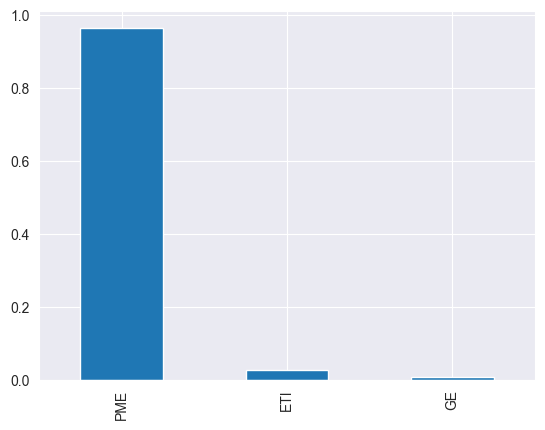

In [64]:
pd.Series(encoder_ce.inverse_transform(df["categorieEntreprise"])).value_counts(normalize=True).plot(kind='bar')

On remarque que la majorité des entreprises sont des PME

<AxesSubplot: >

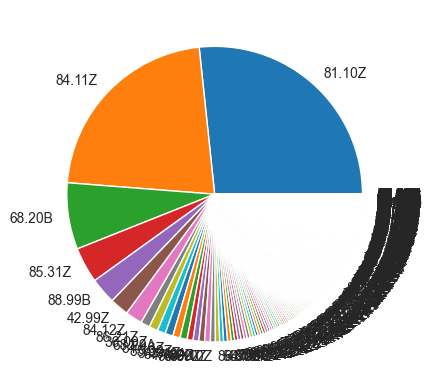

In [65]:
pd.Series(encoder_apul.inverse_transform(df["activitePrincipaleUniteLegale"])).value_counts(normalize=True).plot(kind='pie')

On remarque que la majorité des entreprises sont des entreprises lié aux batiments et travaux publics.

<AxesSubplot: ylabel='categorieJuridiqueUniteLegale'>

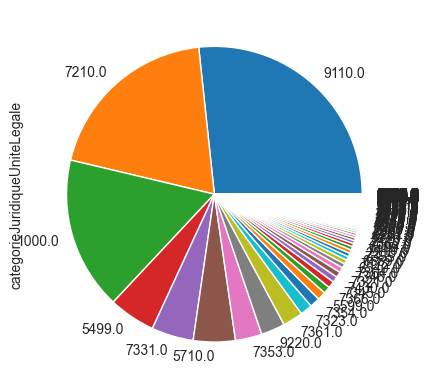

In [68]:
df["categorieJuridiqueUniteLegale"].value_counts(normalize=True).plot(kind='pie')

On observe que la majorité des entreprises sont des syndicats de copropriété, des communes et auto-entrepreneurs.

<AxesSubplot: >

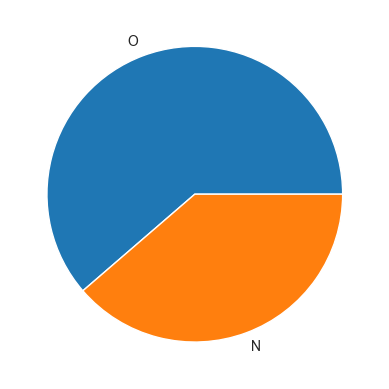

In [72]:
pd.Series(encoder_ceul.inverse_transform(df["caractereEmployeurUniteLegale"])).value_counts(normalize=True).plot(kind='pie')

On remarque que la majorité des entreprises ont des employeurs.

<AxesSubplot: >

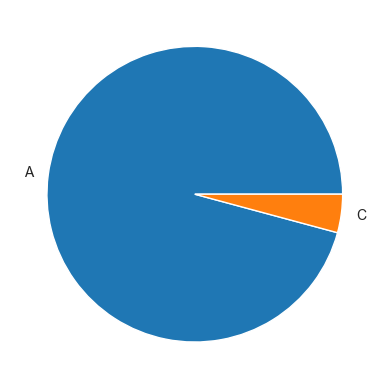

In [73]:
pd.Series(encoder_eaul.inverse_transform(df["etatAdministratifUniteLegale"])).value_counts(normalize=True).plot(kind='pie')

On remarque que la majorité des entreprises sont en activité.

<AxesSubplot: >

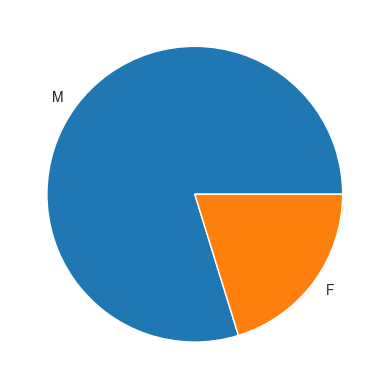

In [13]:
pd.Series(encoder_sul.inverse_transform(df["sexeUniteLegale"])).value_counts(normalize=True).plot(kind='pie')

On remarque que la majorité des unités légaux sont des hommes.

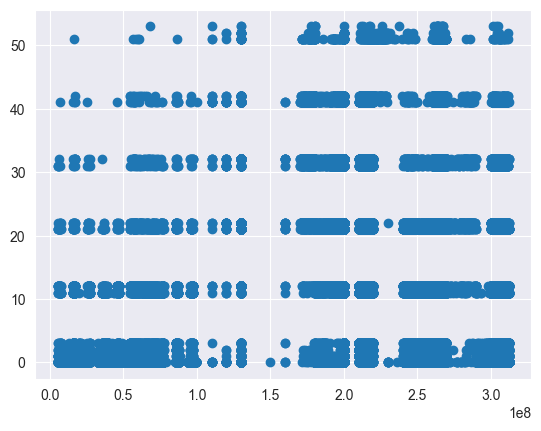

In [17]:
plt.scatter(df["siren"], df["trancheEffectifsUniteLegale"])

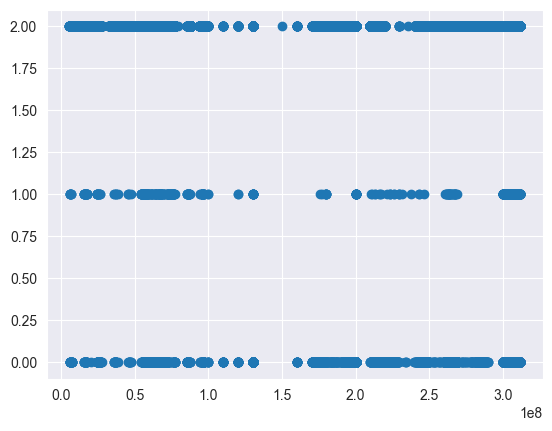

In [19]:
plt.scatter(df["siren"], df["categorieEntreprise"])

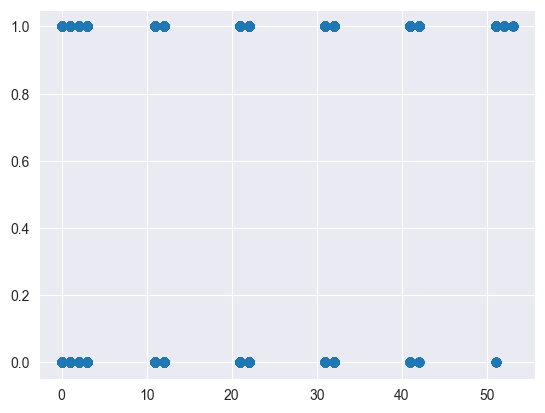

In [21]:
plt.scatter(df["trancheEffectifsUniteLegale"], df["caractereEmployeurUniteLegale"])